## Machine Learning Project - Joy Chen

__Description of the dataset:__
Despite advancements in data-centric security systems and firewalls, individuals remain vulnerable to the theft of personal and financial information due to the sophisticated strategies employed by cybercriminals. The widespread practice of conducting transactions online presents ample opportunities for attackers to launch phishing campaigns. These phishing attempts are increasingly difficult to identify, blending seamlessly with legitimate communications—a challenge even cybersecurity experts acknowledge.

The dataset features 11,430 URLs, each with 87 unique attributes, serving as an effective benchmark for the development and evaluation of machine learning algorithms designed for phishing detection. The attributes are categorized into three groups:
- 56 attributes are based on the structure and syntax of the URLs,
- 24 are derived from the content of the associated web pages,
- 7 are obtained through external service queries.
With an equal distribution of phishing and legitimate URLs, the dataset provides a well-balanced foundation for detection system development.

__Requirements:__ pre-processing and summary of your data. I will require the following:

1) Describe the sample and features (do counts and basic descriptives)

2) Check for missings

3) Make the data machine readable

4) Make at least 4 descriptive plots that help you understand patterns/ trends in the data. 

 

In [5]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


# load the dataset downloaded from Kaggle
df = pd.read_csv(r'C:\Users\joych\OneDrive\Desktop\ML Project\Web page phishing detection\dataset_B_05_2020.csv')

# display plots directly below the code cell that produces them
%matplotlib inline

In [2]:
# data description - general info
df.info

<bound method DataFrame.info of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19 

In [3]:
# data description - count, mean, std, min, max, quartile
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [4]:
# data description - first 10 rows
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [5]:
# output all columns values
df.columns.values

array(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots',
       'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
       'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 

In [6]:
# data cleaning - check if there are duplicates
df.drop_duplicates(inplace=True)

# drop rows with missing values
df.dropna(inplace = True)

In [7]:
# data cleaning - check if there are duplicates
df.drop_duplicates(inplace=True)

In [8]:
# checking object dtype features
object_features=[col for col in df.columns if df[col].dtype=="O"]
print(object_features)

['url', 'status']


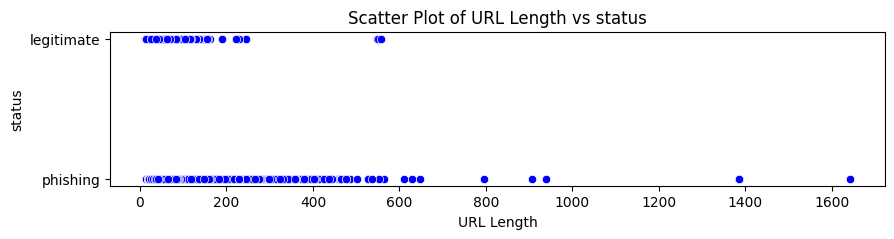

In [9]:
# graph teh scatterplot of url length and status
plt.figure(figsize=(10 , 2))
sns.scatterplot(x='length_url', y='status', color ='blue', data=df)
plt.title('Scatter Plot of URL Length vs status')
plt.xlabel('URL Length')
plt.ylabel('status')
plt.show()

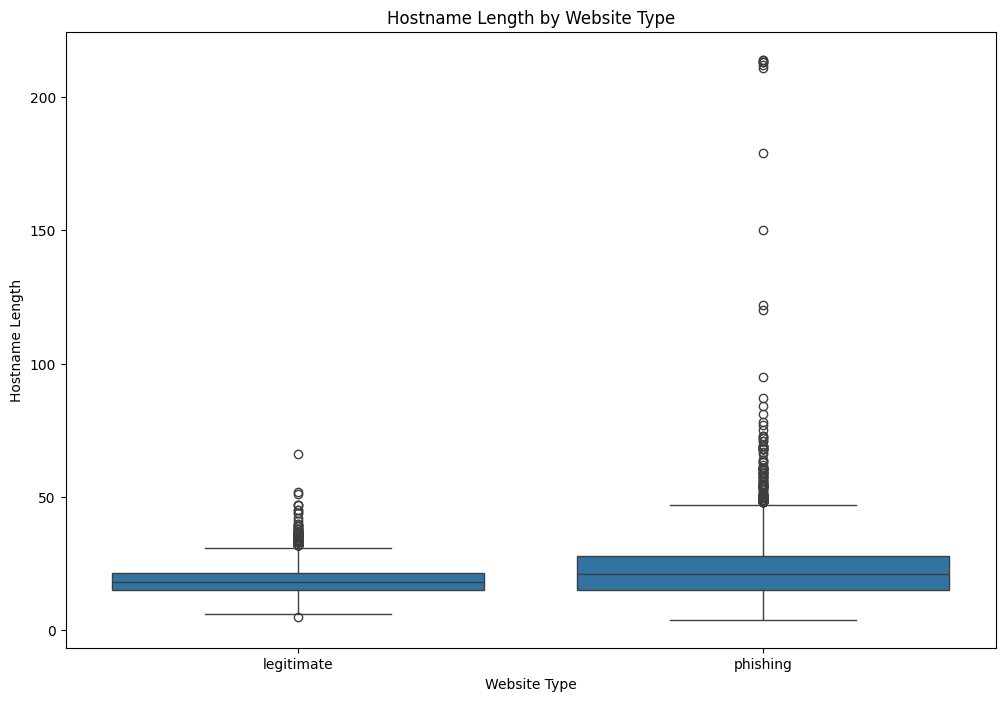

In [10]:
# graph the boxplot - length of hostname and status
plt.figure(figsize=(12, 8))
sns.boxplot(x='status', y='length_hostname', data=df)
plt.title('Hostname Length by Website Type')
plt.xlabel('Website Type')
plt.ylabel('Hostname Length')
plt.show()

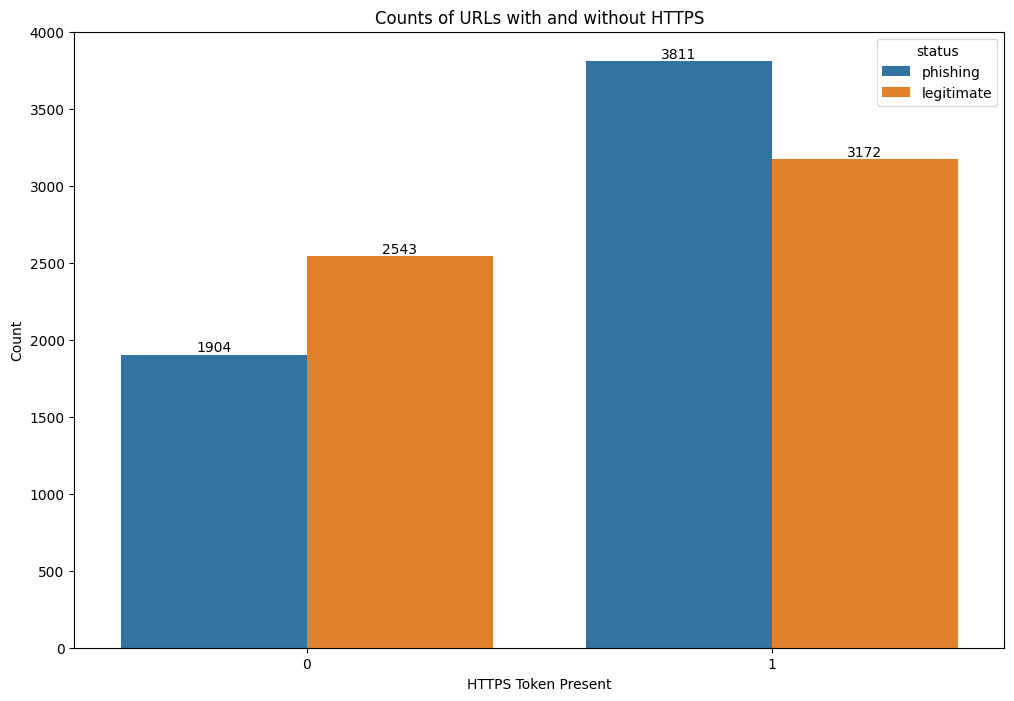

In [11]:
# graph the counts of URLs with and without HTTPS based on two diferent status
plt.figure(figsize=(12, 8))
gr = sns.countplot(x='https_token', hue='status', data=df)
plt.title('Counts of URLs with and without HTTPS')
plt.xlabel('HTTPS Token Present')
plt.ylabel('Count')

for p in gr.patches:
        height = p.get_height()
        if not height:
            continue
        gr.text(p.get_x() + p.get_width()/2., height + 20, f'{int(height)}', ha ='center')
plt.show()

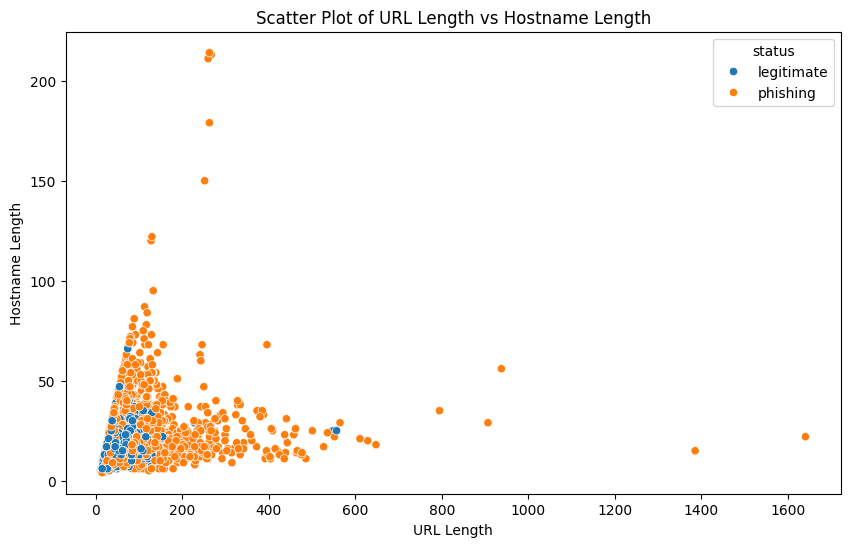

In [12]:
# graph the scatter plot of URL length and hostname length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_url', y='length_hostname', hue='status', data=df)
plt.title('Scatter Plot of URL Length vs Hostname Length')
plt.xlabel('URL Length')
plt.ylabel('Hostname Length')
plt.show()

In [13]:
# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
# legitimate = df[df['status']=='legitimate']
# phishing = df[df['status']=='phishing']
# ax = sns.distplot('status'[legitimate], bins=18, ax = axes[0], kde =False)
# ax.legend()
# ax.set_title('Legitimate')
# ax = sns.distplot('status'[phishing], bins=18,ax = axes[1], kde = False)
# ax.legend()
# _ = ax.set_title('Phishing')

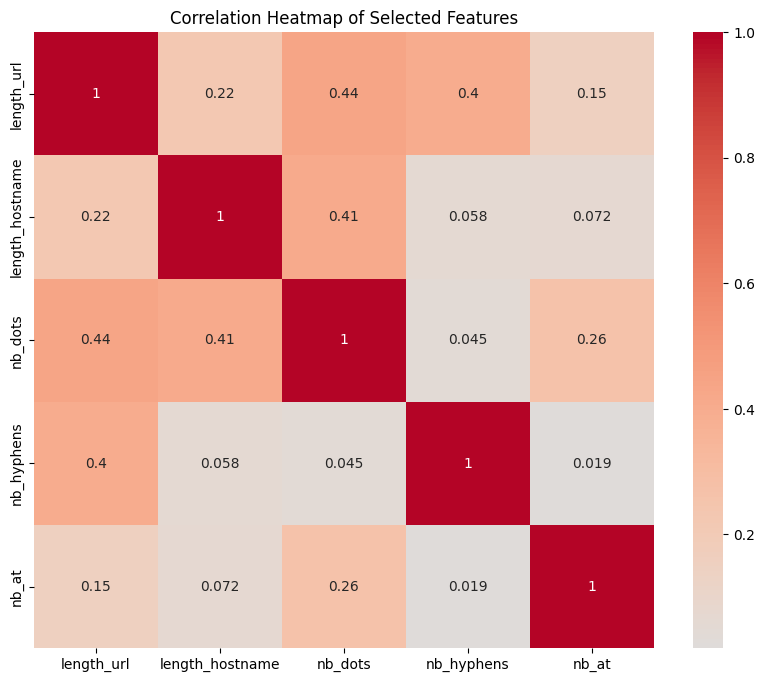

In [14]:
# graph the correlation heatmap of selected features
selected_features = ['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at']
corr_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

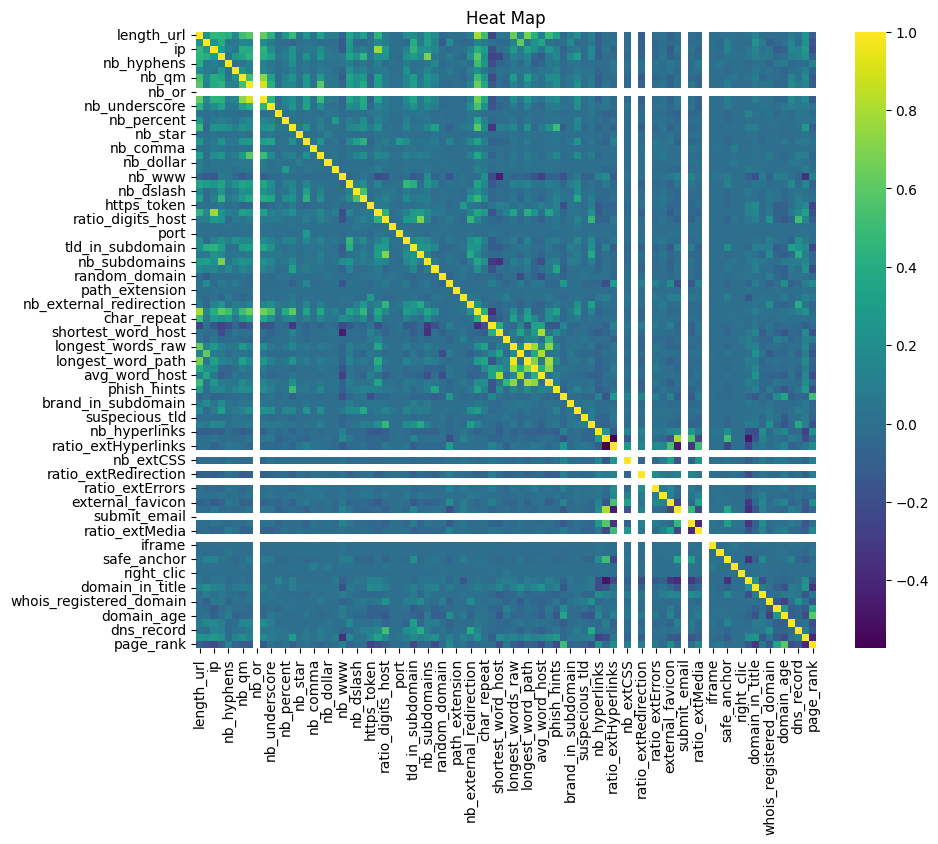

In [15]:
# graph the correlation between metrics in heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title("Heat Map")
plt.show()

In [3]:
# import libraries for the model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [6]:
# converting categorical labels into numeric form
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['status'])

In [7]:
# checking the  first  10 counts of the label generated for the categorical variable
df[['status','label']].head(10)

,status,label
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [19]:
Y1 = df['label']
X1 = df.drop(columns = ['url', 'label', 'status'])

In [20]:
X1.head(5)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [21]:
Y1.head(5)

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int32

In [22]:
X2 = df['url']
X2.head(5)

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
2    https://support-appleld.com.secureupdate.duila...
3                                   http://rgipt.ac.in
4    http://www.iracing.com/tracks/gateway-motorspo...
Name: url, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, stratify = Y1, test_size = 0.2, random_state = 42)

In [24]:
X_train1 = np.expand_dims(X_train1, axis = -1)
X_test1 = np.expand_dims(X_test1, axis = -1)

X_train1.shape

(9144, 87, 1)

In [25]:
# X = df.copy()

# Y = X.pop('label')

# X = df.drop(columns = ['url', 'label'])

# X_train, X_valid, Y_train, Y_valid = \
#     train_test_split(X,Y, stratify = Y, train_size = 0.75)

# input_shape = [X_train.shape[1]]
# print("Input shape is ", input_shape)
# X.head()

In [26]:
# Y.head(5)

In [27]:
# from tensorflow import keras
# from tensorflow.keras import layers

# def build_ann (input_size):
#     model = keras.Sequential([
#         layers.Input(input_size),
#         layers.BatchNormalization(input_shape = input_shape),
#         layers.Dense(512, activation = 'relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.3),
#         layers.Dense(512, activation = 'relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.3),
#         layers.Dense(1, activation = 'sigmoid'),
#     ])
#     return model

In [28]:
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [29]:
#early_stopping = keras.callbacks.EarlyStopping(
#    patience=20,
#    min_delta=0.01,
#    restore_best_weights=True,
#)
#history = model.fit(
#    X_train, Y_train,
#    validation_data=(X_valid, Y_valid),
#   batch_size=512,
#    epochs=200,
#    callbacks=[early_stopping],
#)

In [30]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

ps = PorterStemmer()
corpus_train = []

def albumentations(X, corpus_t):
    stop_words = set(stopwords.words('english'))

    for i in range(len(X)):
        review = X[i].decode('utf-8') if isinstance(X[i], bytes) else X[i]
        print(i,"/", len(X))
        review = re.sub("[^a-zA-Z]", " ", review)
        review = review.lower()
        review = review.split()
        review = [word for word in review if word not in stop_words] 
        review = [ps.stem(word) for word in review]
        review_text = " ".join(review)
        corpus_t.append(review_text)

albumentations(X2,corpus_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joych\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0 / 11430
1 / 11430
2 / 11430
3 / 11430
4 / 11430
5 / 11430
6 / 11430
7 / 11430
8 / 11430
9 / 11430
10 / 11430
11 / 11430
12 / 11430
13 / 11430
14 / 11430
15 / 11430
16 / 11430
17 / 11430
18 / 11430
19 / 11430
20 / 11430
21 / 11430
22 / 11430
23 / 11430
24 / 11430
25 / 11430
26 / 11430
27 / 11430
28 / 11430
29 / 11430
30 / 11430
31 / 11430
32 / 11430
33 / 11430
34 / 11430
35 / 11430
36 / 11430
37 / 11430
38 / 11430
39 / 11430
40 / 11430
41 / 11430
42 / 11430
43 / 11430
44 / 11430
45 / 11430
46 / 11430
47 / 11430
48 / 11430
49 / 11430
50 / 11430
51 / 11430
52 / 11430
53 / 11430
54 / 11430
55 / 11430
56 / 11430
57 / 11430
58 / 11430
59 / 11430
60 / 11430
61 / 11430
62 / 11430
63 / 11430
64 / 11430
65 / 11430
66 / 11430
67 / 11430
68 / 11430
69 / 11430
70 / 11430
71 / 11430
72 / 11430
73 / 11430
74 / 11430
75 / 11430
76 / 11430
77 / 11430
78 / 11430
79 / 11430
80 / 11430
81 / 11430
82 / 11430
83 / 11430
84 / 11430
85 / 11430
86 / 11430
87 / 11430
88 / 11430
89 / 11430
90 / 11430
91 / 1143

In [31]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [32]:
cv = TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y1, stratify = Y1, test_size = 0.2, random_state = 42)

In [33]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [34]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
print(input_size1, input_size2)

(87, 1) (1000, 1)


In [35]:
# evaluation graph of the accuracy and loss
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize = (14,7))
    plt.plot(epochs,acc,'r',label = "Training Accuracy")
    plt.plot(epochs,val_acc,'b',label = "Validation Accuracy")
    plt.legend(loc = 'upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize = (14,7))
    plt.plot(epochs,loss,'r',label = "Training loss")
    plt.plot(epochs,val_loss,'b',label = "Validation loss")
    plt.legend(loc = 'upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [36]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred > 0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

## CNN Model

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

# build the model
def build_cnn(input_size):
    model = keras.Sequential([
    
        layers.Input(input_size),
        layers.Conv1D(16, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(32, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(64, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(128, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(256, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(512, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid'),    
    ])    
    return model

CNN_model1 = build_cnn(input_size1)
CNN_model2 = build_cnn(input_size2)

#summarize the models
CNN_model1.summary()
CNN_model2.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 87, 16)            64        
                                                                 
 dropout (Dropout)           (None, 87, 16)            0         
                                                                 
 batch_normalization (Batch  (None, 87, 16)            64        
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 44, 16)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 32)            1568      
                                                                 
 dropout_1 (Dropout)         (None, 44, 32)           

In [38]:
# running the model 
CNN_model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5', verbose = 1, save_best_only = True), tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 30, verbose = 1)]

CNN_results_1 = CNN_model1.fit(X_train1, Y_train1, validation_split = 0.2, batch_size = 128, epochs = 200, callbacks = callbacks)



Epoch 1/200


57/58 [============================>.] - ETA: 0s - loss: 0.7722 - accuracy: 0.6176
Epoch 1: val_loss improved from inf to 0.67637, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 6s 44ms/step - loss: 0.7715 - accuracy: 0.6178 - val_loss: 0.6764 - val_accuracy: 0.6391
Epoch 2/200
 3/58 [>.............................] - ETA: 1s - loss: 0.5960 - accuracy: 0.7109

c:\Users\joych\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.5646 - accuracy: 0.7294
Epoch 2: val_loss did not improve from 0.67637
58/58 [==============================] - 2s 33ms/step - loss: 0.5648 - accuracy: 0.7295 - val_loss: 0.7706 - val_accuracy: 0.5347
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.4932 - accuracy: 0.7658
Epoch 3: val_loss did not improve from 0.67637
58/58 [==============================] - 2s 34ms/step - loss: 0.4928 - accuracy: 0.7661 - val_loss: 0.7152 - val_accuracy: 0.5353
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.4670 - accuracy: 0.7877
Epoch 4: val_loss did not improve from 0.67637
58/58 [==============================] - 2s 35ms/step - loss: 0.4677 - accuracy: 0.7876 - val_loss: 0.9055 - val_accuracy: 0.5314
Epoch 5/200
57/58 [============================>.] - ETA: 0s - loss: 0.4299 - accuracy: 0.8072
Epoch 5: val_loss did not improve from 0.67637
58/58 [==============================] - 2s 35ms/step 

In [39]:
CNN_model1.evaluate(X_test1, Y_test1, verbose = 1)

 1/72 [..............................] - ETA: 2s - loss: 0.1482 - accuracy: 0.9375

72/72 [==============================] - 1s 7ms/step - loss: 0.2858 - accuracy: 0.8832


[0.28582319617271423, 0.883202075958252]

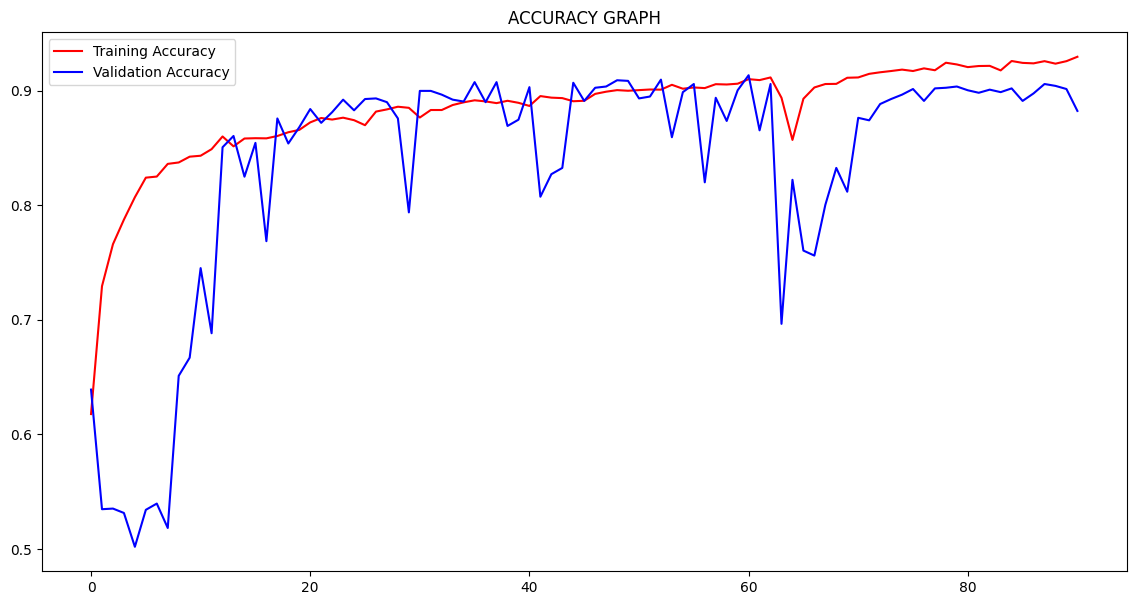

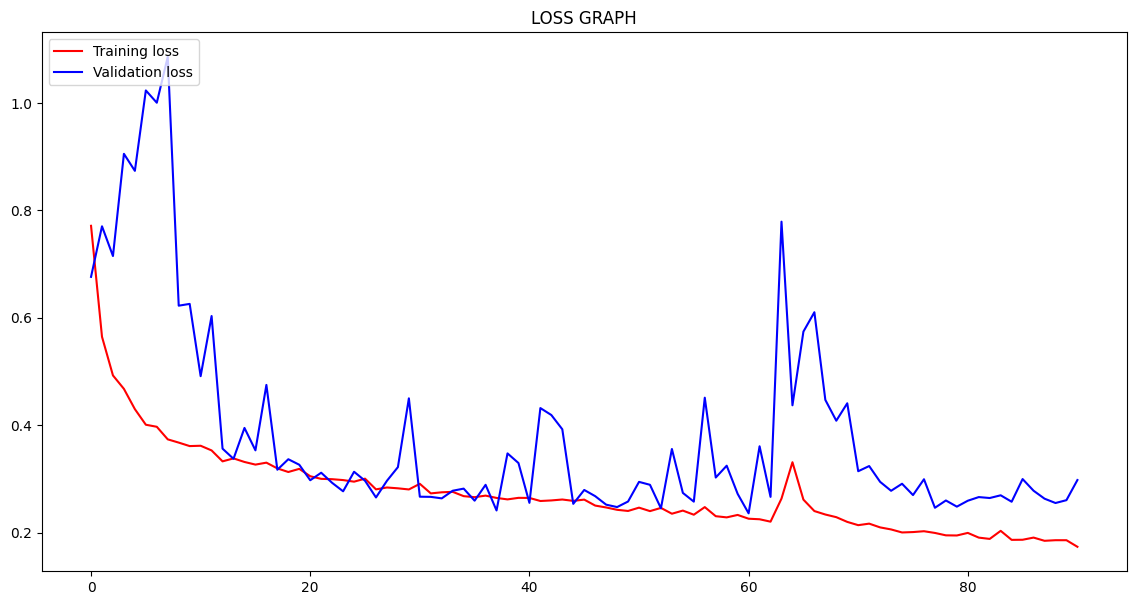

In [40]:
eval_graph(CNN_results_1)

In [41]:
Y_test1

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: label, Length: 2286, dtype: int32

72/72 [==============================] - 1s 6ms/step


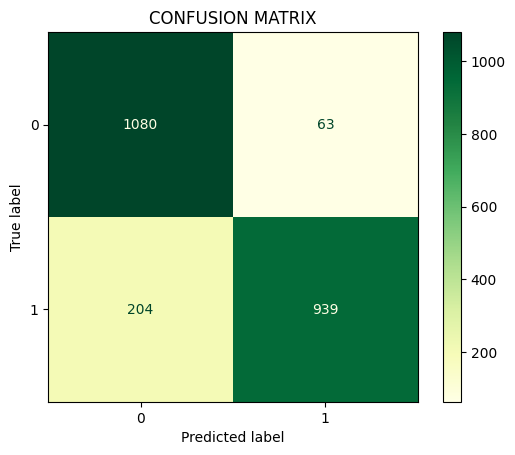

In [42]:
conf_matrix(X_test1, Y_test1, CNN_model1)

In [43]:
CNN_model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5', verbose = 1, save_best_only = True), tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 30, verbose = 1)]

CNN_results_2 = CNN_model2.fit(X_train2, Y_train2, validation_split = 0.2, batch_size = 128, epochs = 200, callbacks = callbacks)


Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.7487 - accuracy: 0.7240
Epoch 1: val_loss improved from inf to 0.69144, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 20s 246ms/step - loss: 0.7487 - accuracy: 0.7240 - val_loss: 0.6914 - val_accuracy: 0.4964


c:\Users\joych\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.4398 - accuracy: 0.7969
Epoch 2: val_loss improved from 0.69144 to 0.68765, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 13s 221ms/step - loss: 0.4398 - accuracy: 0.7969 - val_loss: 0.6877 - val_accuracy: 0.5883
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.8308
Epoch 3: val_loss improved from 0.68765 to 0.67752, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 15s 267ms/step - loss: 0.3887 - accuracy: 0.8308 - val_loss: 0.6775 - val_accuracy: 0.5107
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3421 - accuracy: 0.8537
Epoch 4: val_loss improved from 0.67752 to 0.66483, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 26s 454ms/step - loss: 0.3421 - accuracy: 0.8537 - val_loss: 0.6648 - val_accuracy: 0.5932
Epoch 5/200
5

In [ ]:
CNN_model2.evaluate(X_test2, Y_test2, verbose = 1)

72/72 [==============================] - 1s 11ms/step - loss: 0.3229 - accuracy: 0.9016


[0.3228602409362793, 0.9015747904777527]

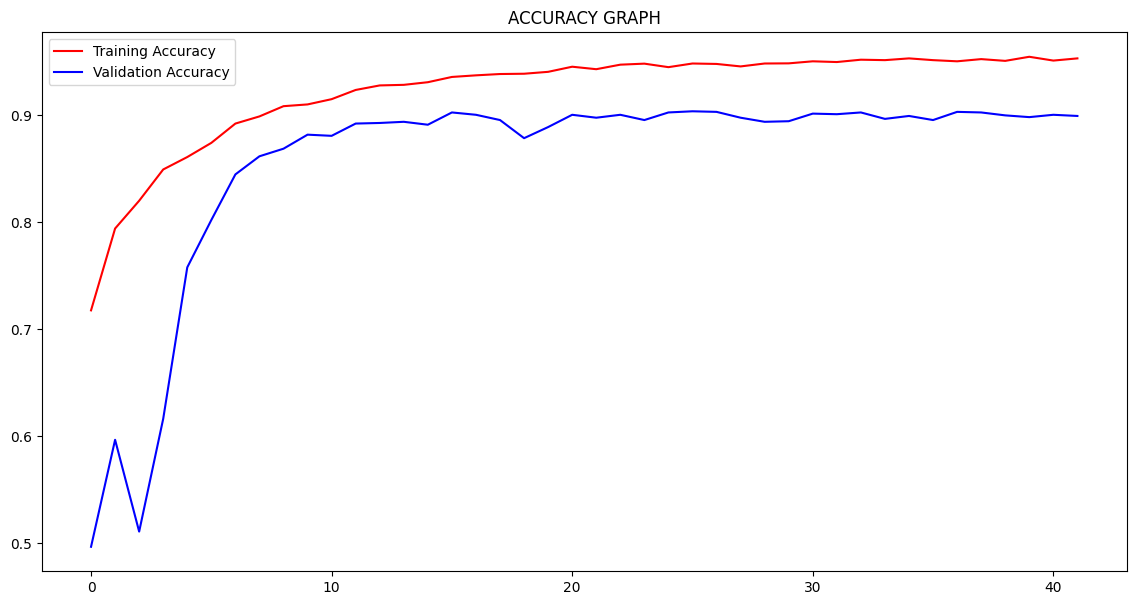

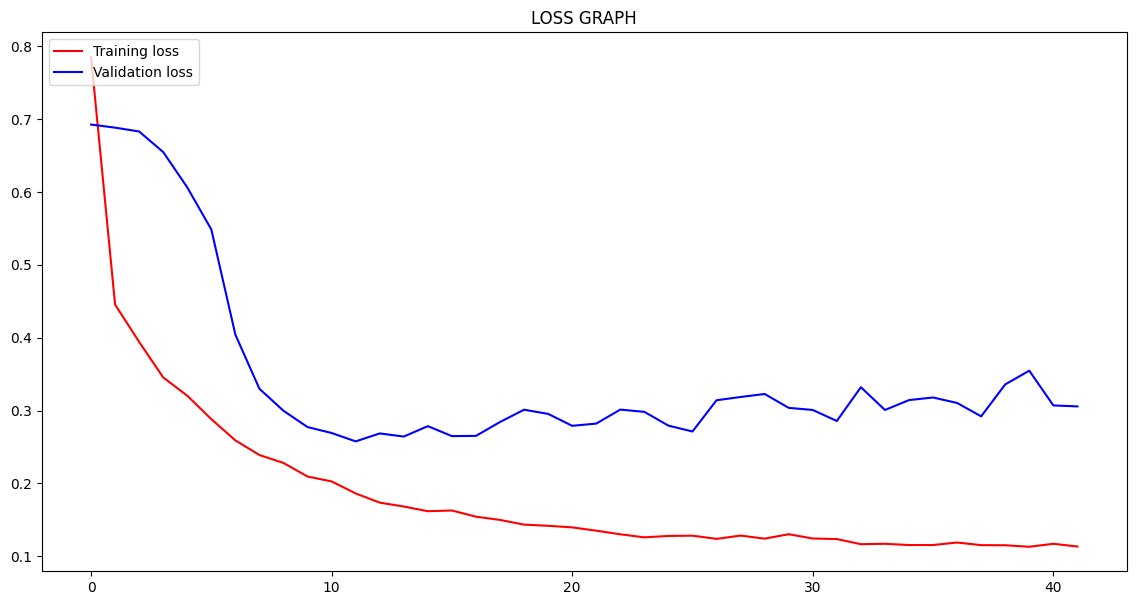

In [ ]:
eval_graph(CNN_results_2)

In [ ]:
Y_test2

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: label, Length: 2286, dtype: int32

72/72 [==============================] - 1s 11ms/step


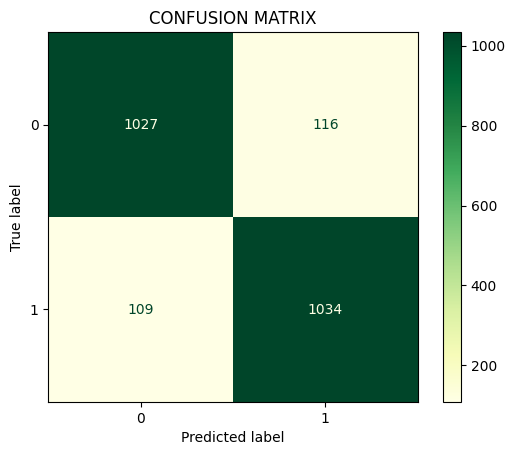

In [ ]:
conf_matrix(X_test2, Y_test2, CNN_model2)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_cnn_lstm(input_size):
    model = keras.Sequential([
    
        layers.Input(input_size),
        layers.Conv1D(16, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(32, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(64, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(128, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2, padding = 'same'),

        layers.Conv1D(256, 3, activation = 'relu', padding = 'same'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),

        layers.LSTM(128, return_sequences = True),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation = 'sigmoid'),    
    ])    
    return model

CNN_LSTM_model1 = build_cnn_lstm(input_size1)
CNN_LSTM_model2 = build_cnn_lstm(input_size2)

#summarize the models
CNN_LSTM_model1.summary()
CNN_LSTM_model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 87, 16)            64        
                                                                 
 dropout_27 (Dropout)        (None, 87, 16)            0         
                                                                 
 batch_normalization_25 (Ba  (None, 87, 16)            64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 44, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_26 (Conv1D)          (None, 44, 32)            1568      
                                                                 
 dropout_28 (Dropout)        (None, 44, 32)           

In [ ]:
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.6412 - accuracy: 0.6144
Epoch 1: val_loss improved from inf to 0.70110, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 9s 60ms/step - loss: 0.6412 - accuracy: 0.6144 - val_loss: 0.7011 - val_accuracy: 0.5735
Epoch 2/200


c:\Users\joych\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.7640
Epoch 2: val_loss did not improve from 0.70110
58/58 [==============================] - 3s 55ms/step - loss: 0.4979 - accuracy: 0.7640 - val_loss: 0.7544 - val_accuracy: 0.5036
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7977
Epoch 3: val_loss did not improve from 0.70110
58/58 [==============================] - 2s 39ms/step - loss: 0.4442 - accuracy: 0.7979 - val_loss: 0.7438 - val_accuracy: 0.5036
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.4185 - accuracy: 0.8141
Epoch 4: val_loss did not improve from 0.70110
58/58 [==============================] - 3s 57ms/step - loss: 0.4194 - accuracy: 0.8137 - val_loss: 0.7056 - val_accuracy: 0.5036
Epoch 5/200
58/58 [==============================] - ETA: 0s - loss: 0.4068 - accuracy: 0.8197
Epoch 5: val_loss improved from 0.70110 to 0.63513, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACT

72/72 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.8762


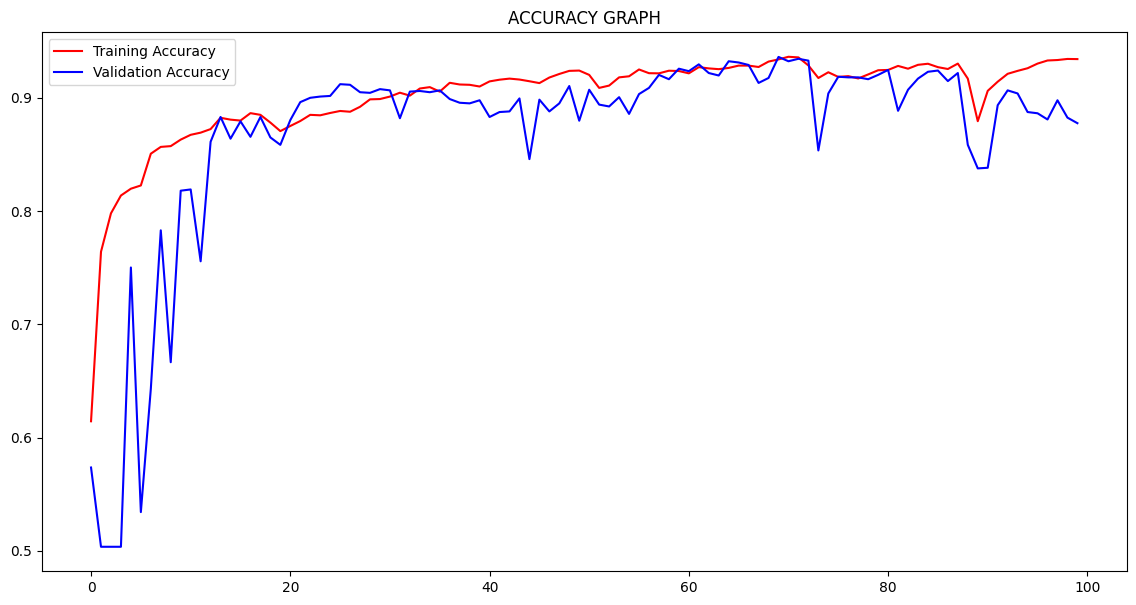

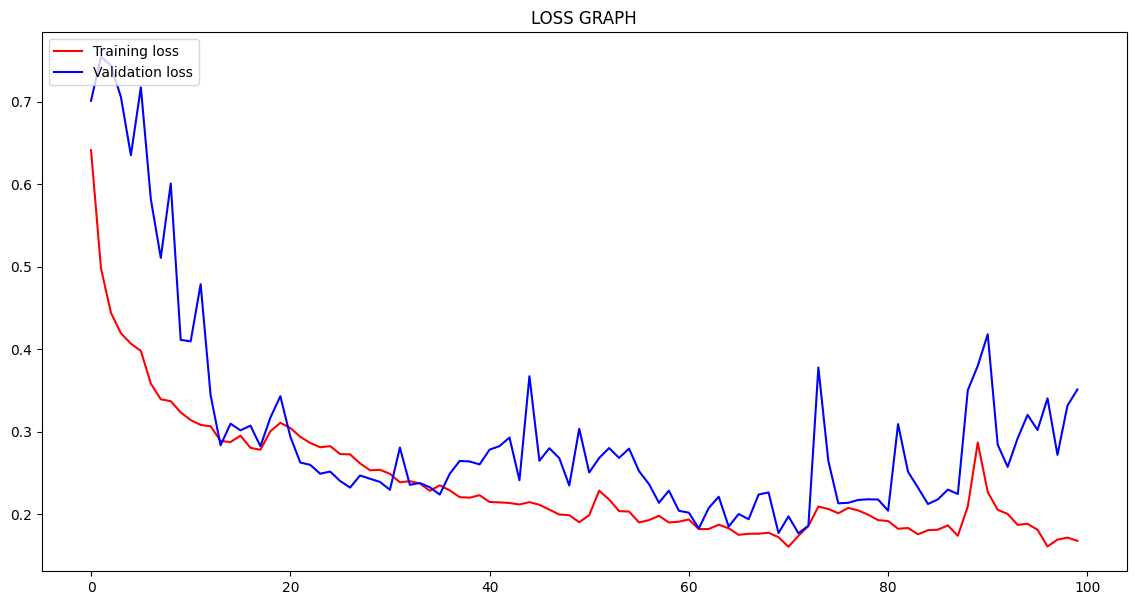

In [ ]:
CNN_LSTM_model1.evaluate(X_test1, Y_test1)
eval_graph(CNN_LSTM_results_1)

72/72 [==============================] - 1s 6ms/step


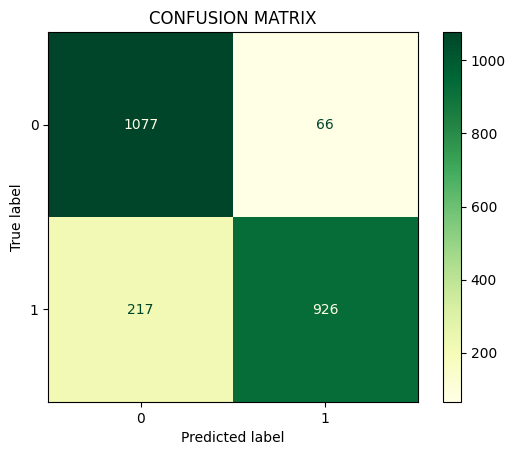

In [ ]:
conf_matrix(X_test1, Y_test1, CNN_LSTM_model1)

In [ ]:
CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.5406 - accuracy: 0.7318
Epoch 1: val_loss improved from inf to 0.69628, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 54s 395ms/step - loss: 0.5406 - accuracy: 0.7318 - val_loss: 0.6963 - val_accuracy: 0.5036
Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.4324 - accuracy: 0.8048
Epoch 2: val_loss improved from 0.69628 to 0.68764, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 27s 467ms/step - loss: 0.4324 - accuracy: 0.8048 - val_loss: 0.6876 - val_accuracy: 0.5036
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8349
Epoch 3: val_loss improved from 0.68764 to 0.66542, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 23s 405ms/step - loss: 0.3859 - accuracy: 0.8349 - val_loss: 0.6654 - val_accurac

72/72 [==============================] - 2s 21ms/step - loss: 0.3058 - accuracy: 0.9195


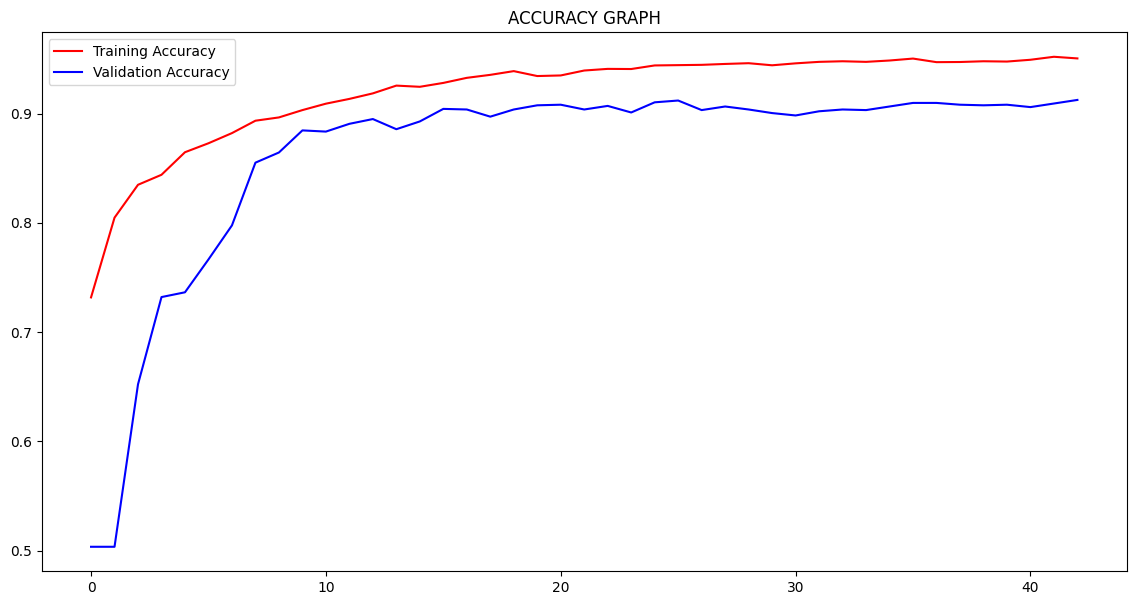

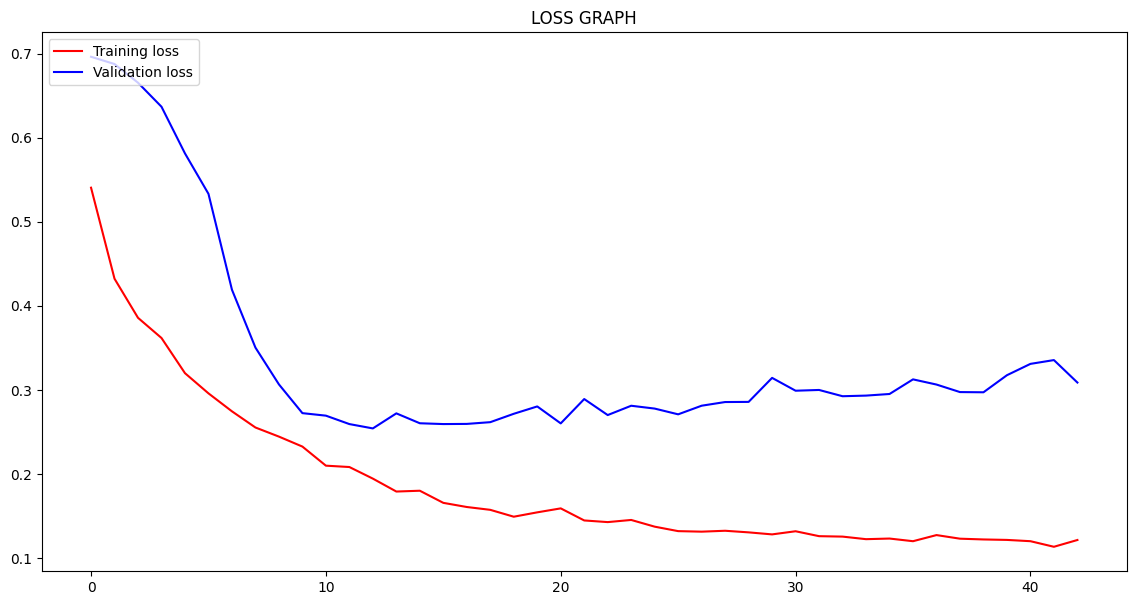

In [ ]:
CNN_LSTM_model2.evaluate(X_test2, Y_test2)
eval_graph(CNN_LSTM_results_2)

72/72 [==============================] - 2s 17ms/step


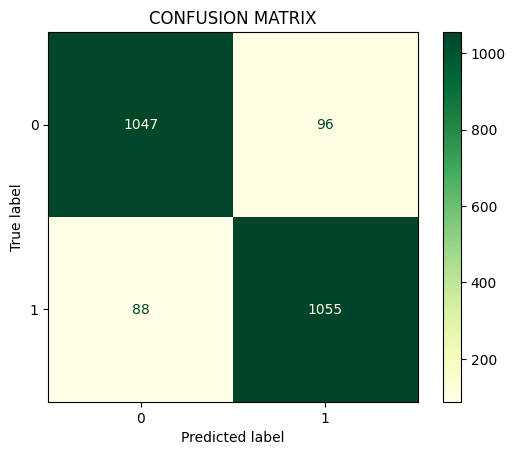

In [ ]:
conf_matrix(X_test2, Y_test2, CNN_LSTM_model2)